# Linear Target; Variable Number of Confounds

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & = 4; \\
s & >= 0; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment that linear regression should be
very good at. $F$ is a linear function of $X$, there are a small number of
features, a variable number of confounding features, and normally distributed noise.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = 4

In [4]:
S = list(range(0, 21, 2))

In [5]:
SIGMA = 20.0

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.LinearWithNoiseExperiment(m=M, s=S[3], sigma=SIGMA, n=N)

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


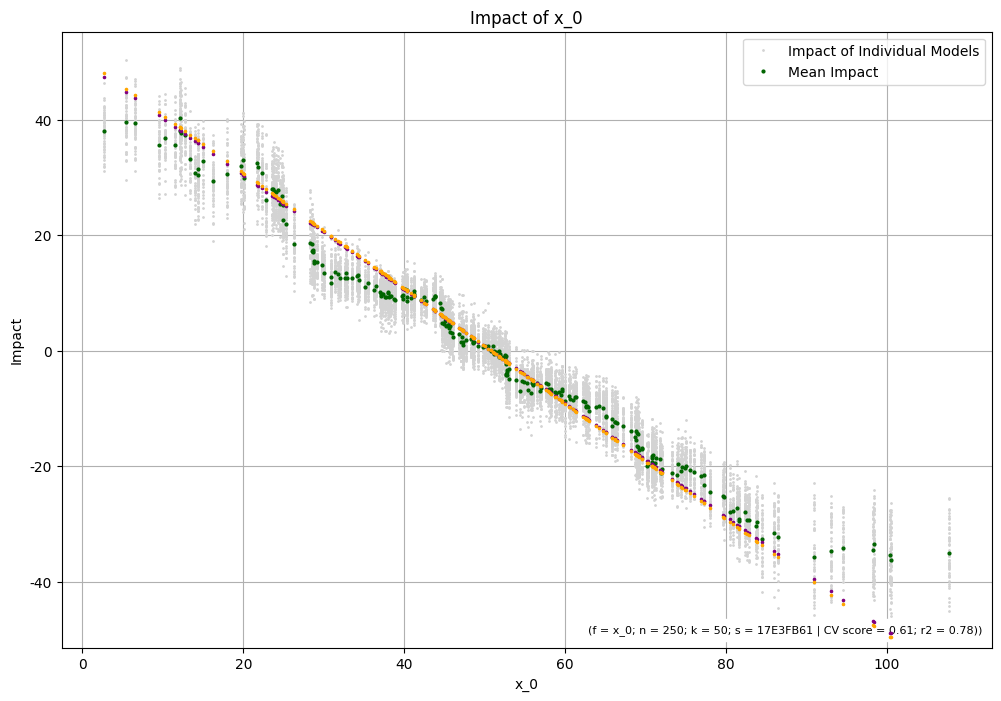

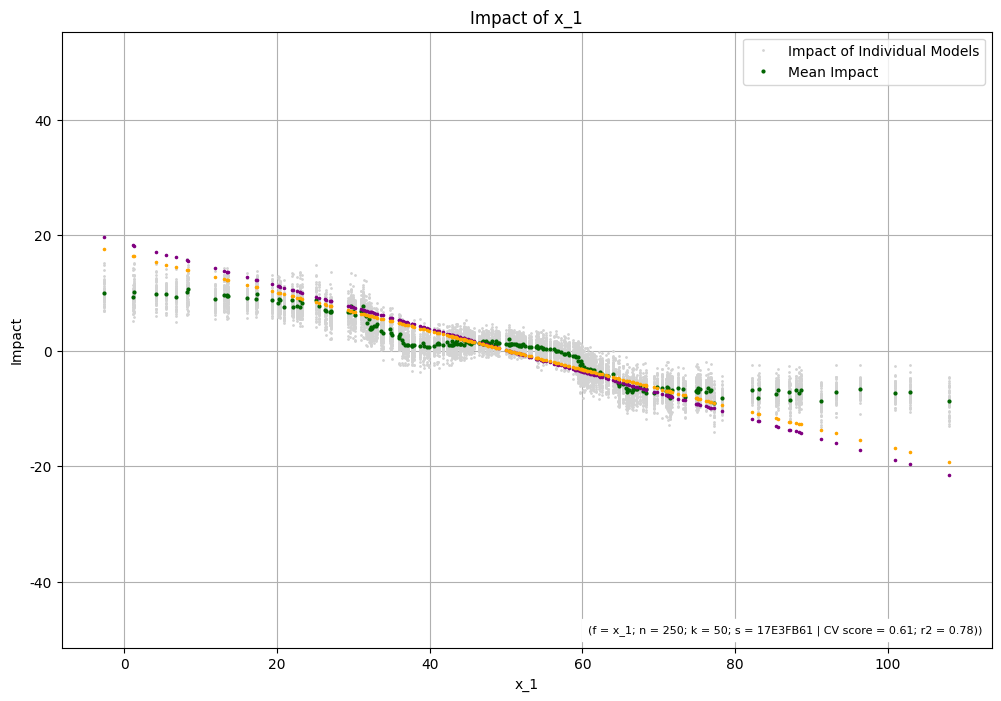

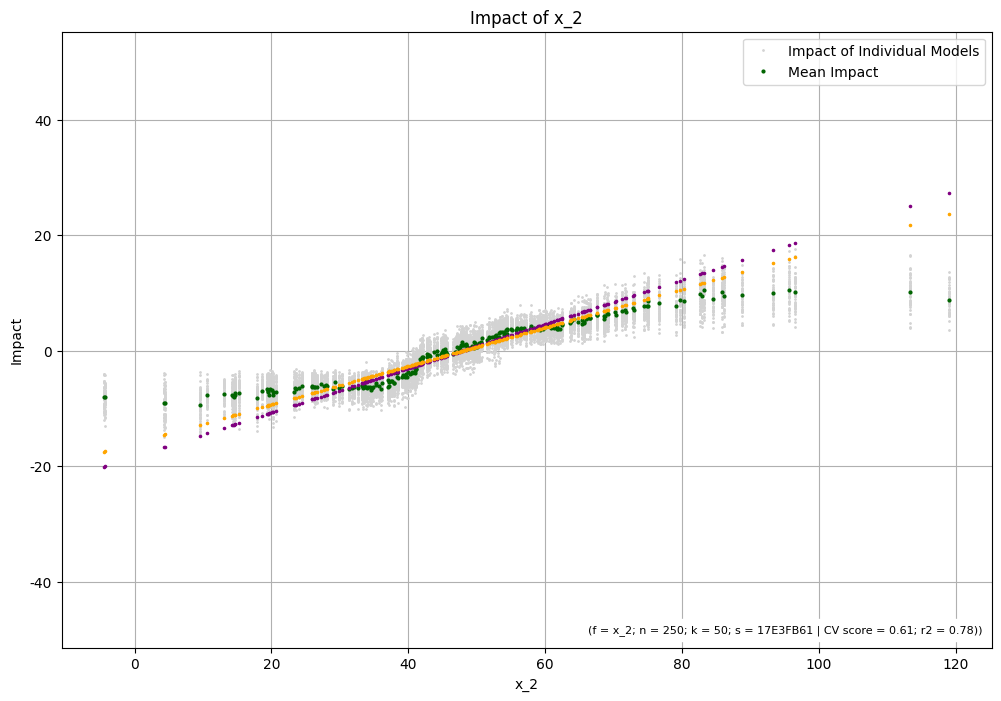

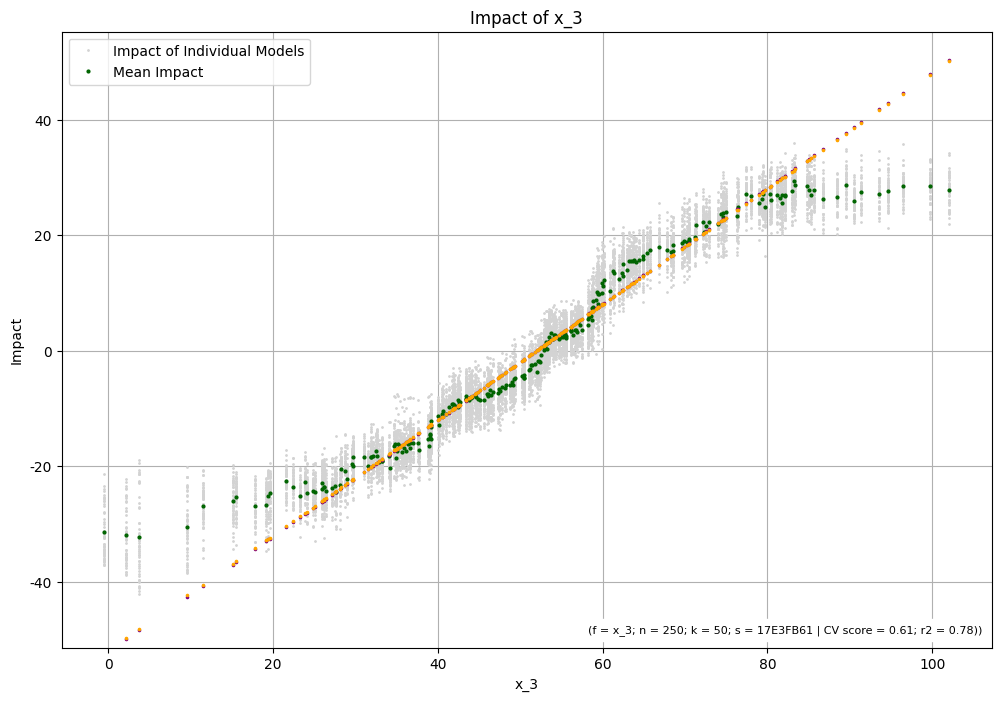

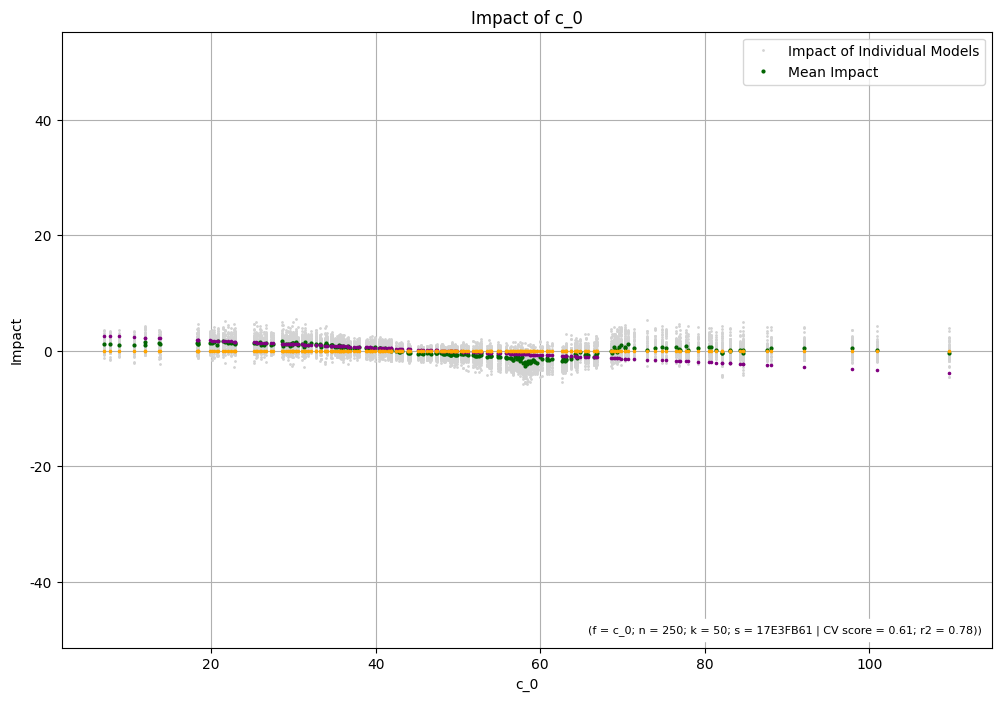

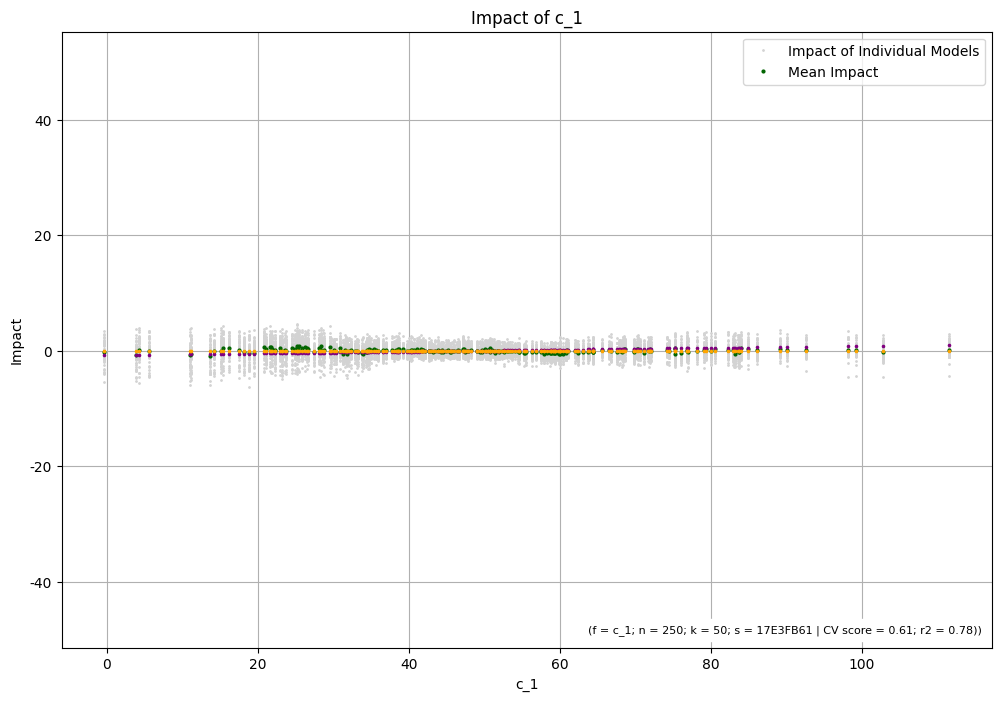

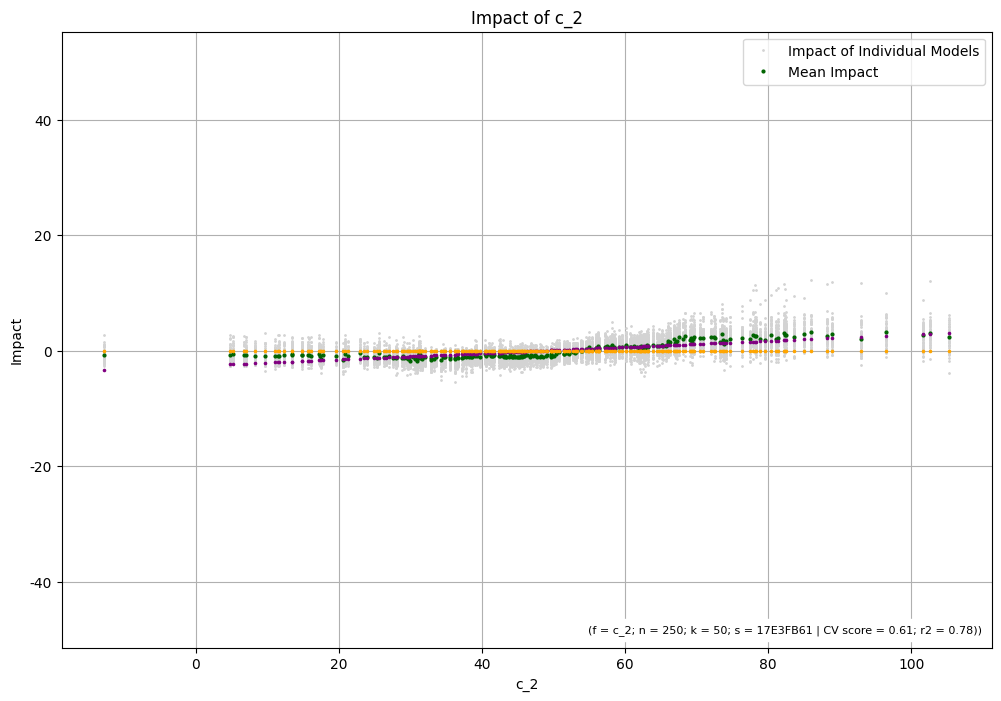

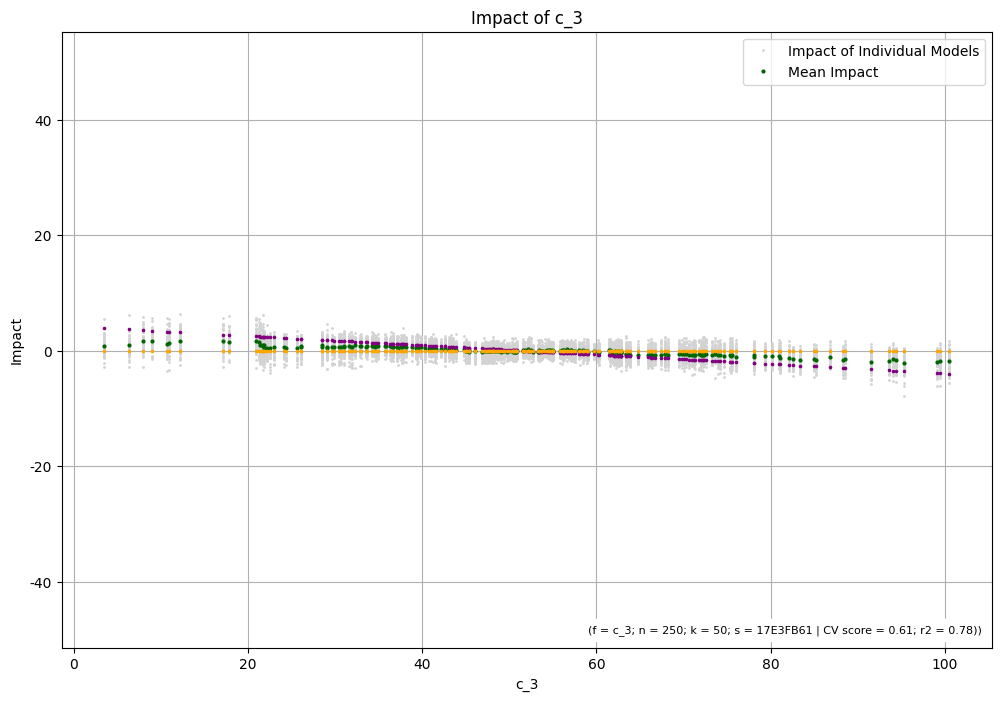

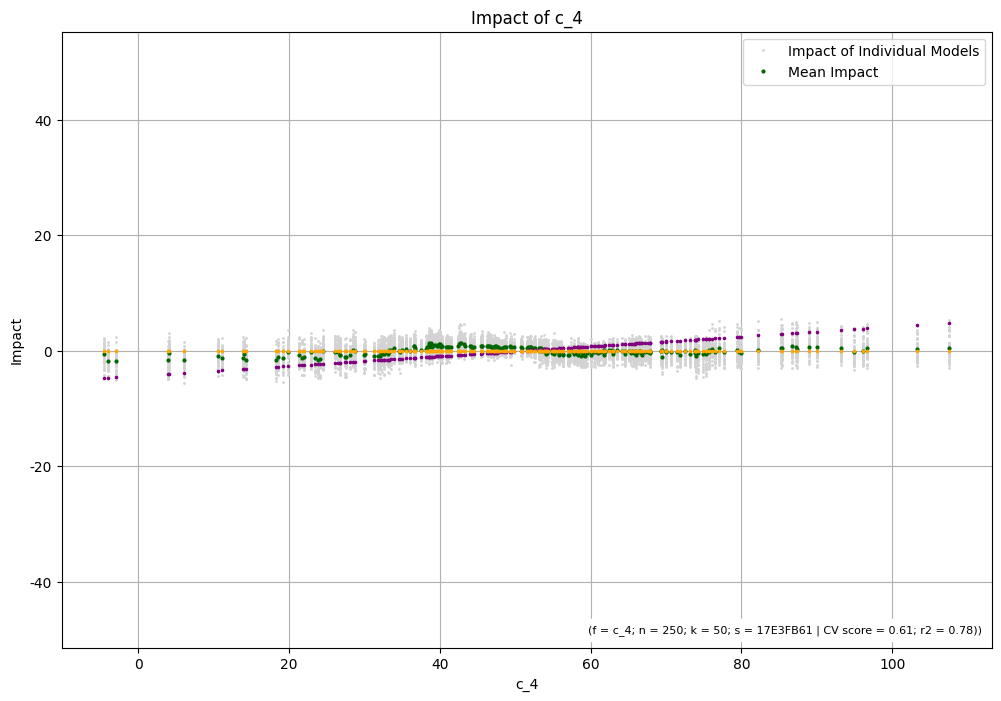

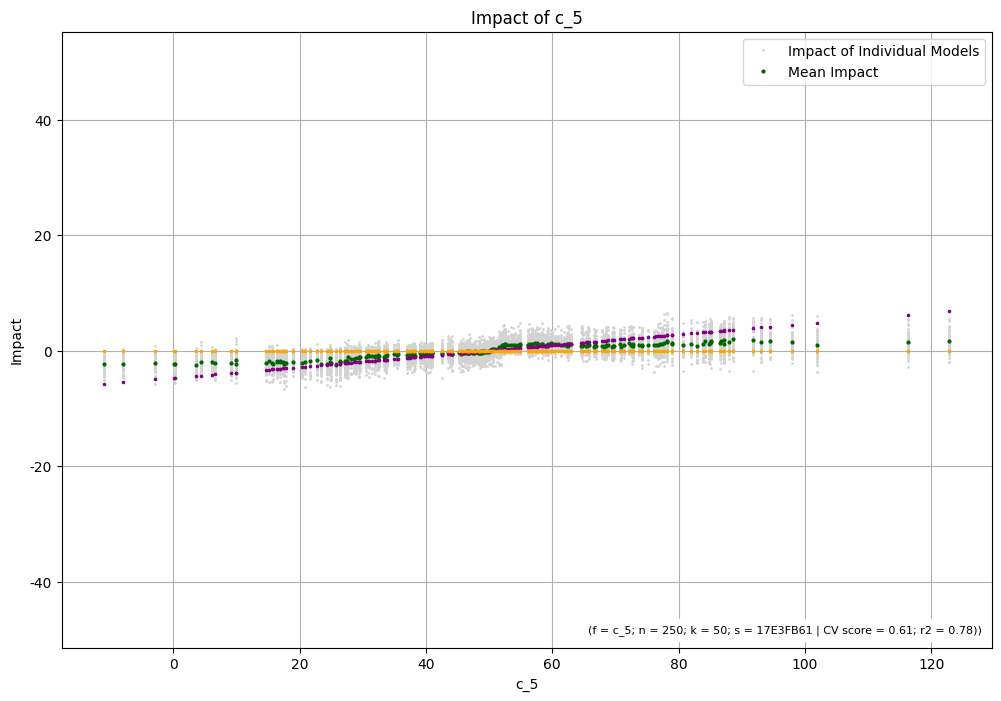

In [8]:
impact_charts = scenario.model_impact_charts(linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,c_0,c_1,c_2,c_3,c_4,c_5,mu_x_i,mu_c_i
0,RMSE,3.758676,2.426610,2.165547,4.465305,1.010608,0.283320,1.304740,0.710901,0.656540,1.205156,3.204034,0.861878
0,MAE,2.707039,1.708868,1.377701,2.656164,0.875224,0.213694,1.119352,0.531261,0.532783,1.056788,2.112443,0.721517
0,MED_AE,2.198886,1.321146,0.995328,1.665491,0.789572,0.155031,0.961837,0.511712,0.502017,0.987328,1.545213,0.651250
0,LR_RMSE,0.293644,0.775106,0.950495,0.082494,1.184485,0.321258,1.093568,1.539898,1.672491,2.117244,0.525435,1.321491
0,LR_MAE,0.238446,0.616045,0.731083,0.065730,0.958571,0.258601,0.871649,1.215004,1.316465,1.654624,0.412826,1.045819
0,LR_MED_AE,0.208325,0.524866,0.594470,0.054319,0.821684,0.225565,0.752679,0.988954,1.063611,1.399311,0.345495,0.875301


In [10]:
scenario.linreg_r2(), scenario.model_r2()

(0.7028703491227062, 0.7808163400389336)

## A Multi-Scenario Experiment

In [11]:
experiment = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA, n=N)

In [12]:
df_model_errors = experiment.model_errors(linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


(0.0, 5.5)

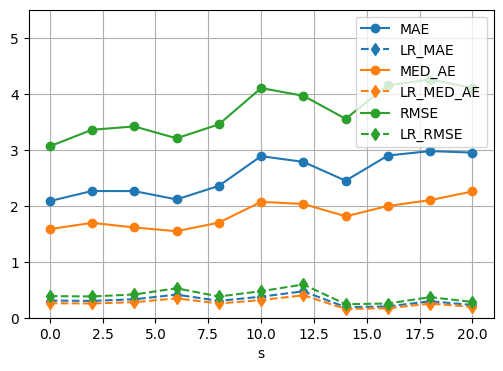

In [13]:
ax = experiment.plot_model_errors(x_col="s", y_col="mu_x_i", figsize=(6, 4))
ax.set_ylim(0.0, 5.5)

(0.0, 5.5)

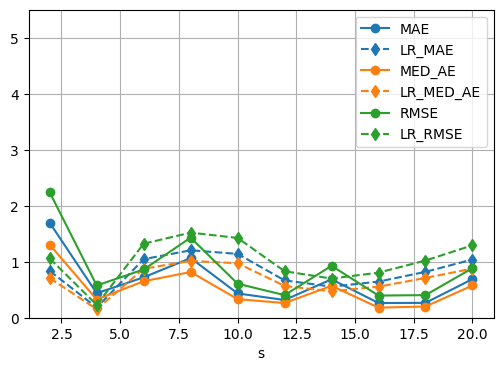

In [14]:
ax = experiment.plot_model_errors(x_col="s", y_col="mu_c_i", figsize=(6, 4))
ax.set_ylim(0.0, 5.5)

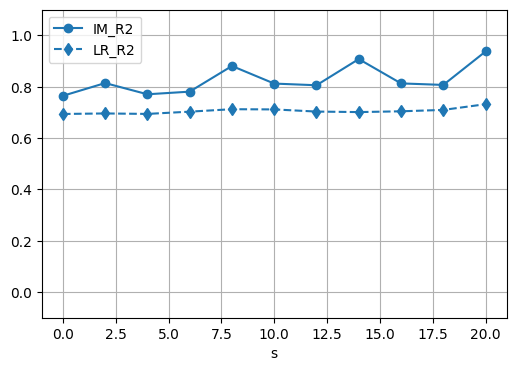

In [15]:
ax = experiment.plot_r2(x_col="s", figsize=(6, 4))